In [ ]:
import matplotlib
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from google.colab import drive
import os
from matplotlib import pyplot as plt
!%mathplotlib inline
from google.colab import drive
drive.mount('/content/drive')
filename = '/content/drive/MyDrive/EDABK/DATA/full.csv'
with open(filename, 'r') as f:
  data = f.read()

print(data)

In [2]:
data = pd.read_csv('/content/drive/MyDrive/EDABK/DATA/full.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df = pd.read_csv("/content/drive/MyDrive/EDABK/DATA/full.csv")
df1 = df.drop(columns = 'Outcome')
target = df['Outcome']
train_data = df.iloc[1:595]
test_data = df.iloc[595:]
X_train=train_data.iloc[:,:8]
y_train=train_data.iloc[:,8]
X_test=test_data.iloc[:,:8]
y_test=test_data.iloc[:,8]
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (594, 8)
y_train shape: (594,)
X_test shape: (173, 8)
y_test shape: (173,)


In [4]:
df1.shape

(768, 8)

In [5]:

data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [7]:
print(df1)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [8]:
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True

In [9]:
df1[df1['Pregnancies'].apply(is_float)].head(800)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [10]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()


scaled_df1 = scaler.fit_transform(df1)
print(scaled_df1)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [11]:
from sklearn.preprocessing import StandardScaler



scale_list = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

scale = StandardScaler()

X_train = scale.fit_transform(X_train[scale_list])
X_test = scale.transform(X_test[scale_list])

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [14]:
scaler.fit(X_train)


MinMaxScaler()

In [15]:
X_train_scaled = scaler.transform(X_train)


In [16]:
X_test_scaled = scaler.transform(X_test)


In [17]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 32)                288       
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 batch_normalization_5 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dense_26 (Dense)            (None, 64)                2112      
                                                                 
 dense_27 (Dense)            (None, 128)               8320      
                                                                 
 dense_28 (Dense)            (None, 256)               33024     
                                                      

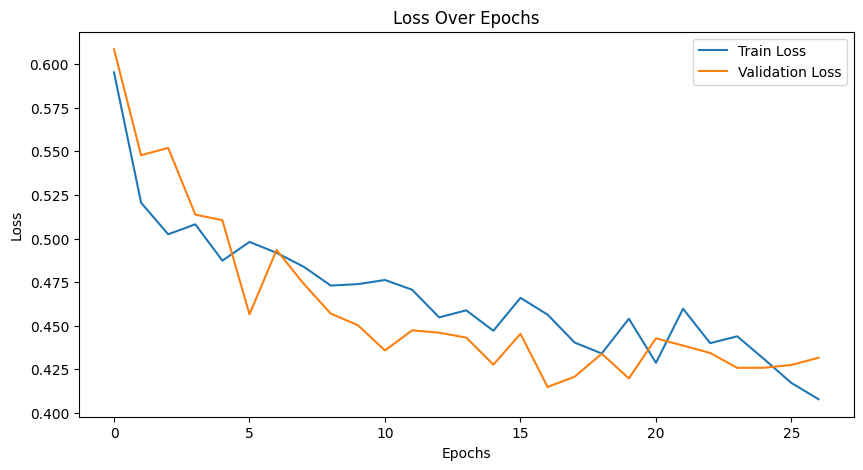

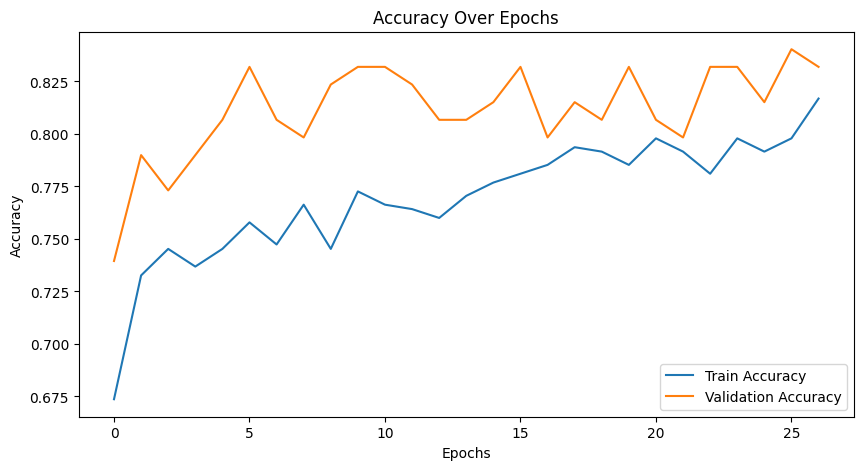

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from keras import regularizers
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping



def lr_schedule(epoch):
    if epoch < 10:
        return 0.001
    else:
        return 0.01






model = Sequential()

model.add(Dense(32, activation='relu', input_dim=8))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))



model.add(Dense(1, activation='sigmoid'))


model.summary()

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

lr_scheduler = LearningRateScheduler(lr_schedule)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)






checkpoint = ModelCheckpoint('/content/drive/MyDrive/EDABK/WEIGHT/model_weights.h5',
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='max'
                            )
history = model.fit(X_train, y_train, epochs=200, validation_split=0.2, verbose=1, batch_size=32, callbacks=[checkpoint, early_stopping])



train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']


plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()









In [28]:
model.load_weights('/content/drive/MyDrive/EDABK/WEIGHT/model_weights.h5')

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

6/6 [==============================] - 0s 4ms/step - loss: 0.4501 - accuracy: 0.8266
Loss: 0.4500763714313507
Accuracy: 0.8265895843505859


In [29]:
!pip install keras-tuner
import keras_tuner as kt


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.3 MB/s eta 0:00:00


In [30]:
def build_model(hp):

    model = Sequential()

    model.add(Dense(32, activation='relu', input_dim=8))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())

    model.add(Dense(64, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(256, activation='relu'))



    model.add(Dense(1, activation='sigmoid'))





    optimizer = hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop', 'adadelta'])

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [31]:
tuner = kt.RandomSearch(build_model, objective='val_accuracy', max_trials=5)

In [32]:
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

for trial in tuner.oracle.get_best_trials(num_trials=5):
    print("my_dir1:", trial.trial_id)
    print("Optimizer:", trial.hyperparameters.values['optimizer'])
    print("Hyperparameters:", trial.hyperparameters.values)
    print(accuracy)
    print()

Trial 4 Complete [00h 00m 10s]
val_accuracy: 0.5202311873435974

Best val_accuracy So Far: 0.8034682273864746
Total elapsed time: 00h 00m 30s
my_dir1: 2
Optimizer: rmsprop
Hyperparameters: {'optimizer': 'rmsprop'}
0.8265895843505859

my_dir1: 0
Optimizer: adam
Hyperparameters: {'optimizer': 'adam'}
0.8265895843505859

my_dir1: 1
Optimizer: sgd
Hyperparameters: {'optimizer': 'sgd'}
0.8265895843505859

my_dir1: 3
Optimizer: adadelta
Hyperparameters: {'optimizer': 'adadelta'}
0.8265895843505859



In [36]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'rmsprop'}

In [37]:
model = tuner.get_best_models(num_models=1)[0]

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 batch_normalization (Batch  (None, 32)                128       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 256)               33024     
                                                        

In [39]:

def build_model(hp):
    model = Sequential()

    num_layers = hp.Int('num_layers', min_value=1, max_value=5, step=1)

    for i in range(num_layers):
        units = hp.Int(f'units_{i}', min_value=32, max_value=512, step=32)

        activation = hp.Choice(f'activation_{i}', values=['relu', 'sigmoid', 'tanh'])

        if i == 0:
            model.add(Dense(units, activation=activation, input_shape=(8,)))
        else:
            model.add(Dense(units, activation=activation))

    optimizer = hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop', 'adadelta'])

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])




    checkpoint_callback = ModelCheckpoint(filepath='/content/drive/MyDrive/EDABK/weight final',
                                          monitor='val_accuracy',
                                          mode='max',
                                          save_best_only=True)


    return model

In [40]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=25,
    executions_per_trial=1,
    directory='chay test toi uu',
    project_name='my_project1'
)

In [41]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 5, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
activation_0 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid', 'tanh'], 'ordered': False}
optimizer (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'sgd', 'rmsprop', 'adadelta'], 'ordered': False}


In [42]:
tuner.search(X_train, y_train, epochs=20, validation_data=(X_test, y_test),
              callbacks=[checkpoint])

Trial 25 Complete [00h 00m 07s]
val_accuracy: 0.6878612637519836

Best val_accuracy So Far: 0.8265895843505859
Total elapsed time: 00h 02m 50s


In [ ]:
tuner.results_summary()

Results summary
Results in chay test toi uu/my_project1
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 07 summary
Hyperparameters:
num_layers: 3
units_0: 192
activation_0: relu
optimizer: adam
units_1: 128
activation_1: relu
units_2: 32
activation_2: tanh
units_3: 96
activation_3: tanh
units_4: 160
activation_4: tanh
Score: 0.8323699235916138

Trial 18 summary
Hyperparameters:
num_layers: 3
units_0: 160
activation_0: tanh
optimizer: adam
units_1: 224
activation_1: relu
units_2: 256
activation_2: tanh
units_3: 256
activation_3: sigmoid
units_4: 224
activation_4: sigmoid
Score: 0.8323699235916138

Trial 13 summary
Hyperparameters:
num_layers: 4
units_0: 256
activation_0: relu
optimizer: adam
units_1: 128
activation_1: sigmoid
units_2: 64
activation_2: sigmoid
units_3: 256
activation_3: sigmoid
units_4: 192
activation_4: relu
Score: 0.8208092451095581

Trial 23 summary
Hyperparameters:
num_layers: 3
units_0: 224
activation_0: relu
optimizer: rmsprop
units_1:

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_84 (Dense)            (None, 192)               1728      
                                                                 
 dropout_16 (Dropout)        (None, 192)               0         
                                                                 
 batch_normalization_16 (Ba  (None, 192)               768       
 tchNormalization)                                               
                                                                 
 dense_85 (Dense)            (None, 128)               24704     
                                                                 
 dense_86 (Dense)            (None, 32)                4128      
                                                                 
 dense_87 (Dense)            (None, 96)                3168      
                                                     

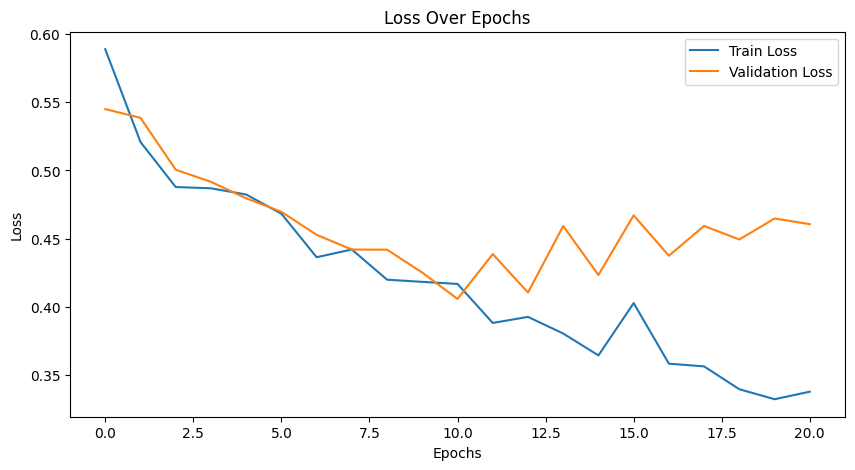

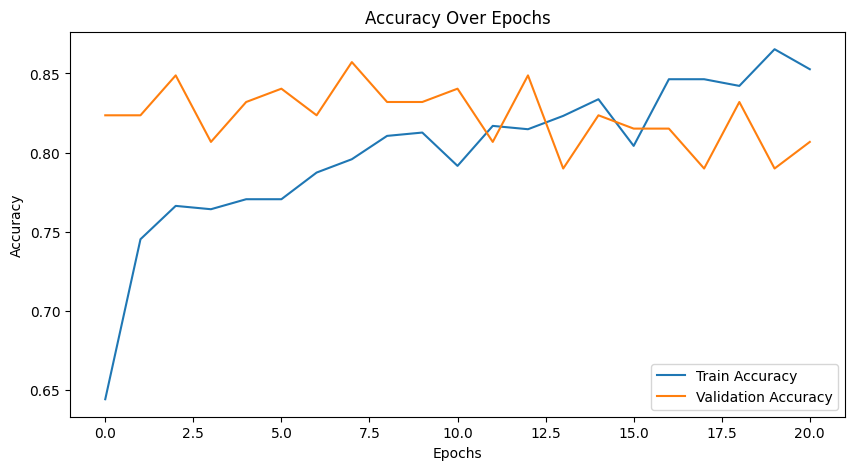

In [74]:
from keras.optimizers import RMSprop


def lr_schedule(epoch):
    if epoch < 10:
        return 0.001
    else:
        return 0.01






model = Sequential()

model.add(Dense(192, activation='relu', input_dim=8))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(96, activation='tanh'))



model.add(Dense(1, activation='sigmoid'))


model.summary()

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

lr_scheduler = LearningRateScheduler(lr_schedule)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)





# Khởi tạo một ModelCheckpoint callback
checkpoint = ModelCheckpoint('/content/drive/MyDrive/EDABK/WEIGHT/model_weights.h5',
                             monitor='val_accuracy',  # Điều kiện để lưu trọng số (ví dụ: theo val_loss)
                             verbose=1,
                             save_best_only=True,  # Lưu trọng số tốt nhất
                             mode='max'  # Chế độ tối ưu: min hoặc max
                            )
history = model.fit(X_train, y_train, epochs=200, validation_split=0.2, verbose=1, batch_size=32, callbacks=[checkpoint, early_stopping])


# Lấy thông tin về mất mát và độ chính xác từ lịch sử huấn luyện
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Vẽ đồ thị loss
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Vẽ đồ thị accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [75]:
model.load_weights('/content/drive/MyDrive/EDABK/WEIGHT/model_weights.h5')

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

6/6 [==============================] - 0s 9ms/step - loss: 0.4770 - accuracy: 0.8208
Loss: 0.4769895672798157
Accuracy: 0.8208092451095581
